# IDAES-PSE and Reinforcement Learning (RL): Methanol Example Notebook

**CO + 2H<sub>2</sub> &rarr; CH<sub>3</sub>OH** 

In [1]:
from RL_CORE import RL_call
import widgets 
import ipywidgets
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## Select Units

In [2]:
w = widgets.select_units()

Use the dropdowns to select number of units in the flowsheet.

In [3]:
display(w)

interactive(children=(Dropdown(description='Heater', index=1, options=('0', '1', '2', '3'), style=DescriptionS…

Check that the resulting list matches your input.

In [4]:
class user_inputs:
    def __init__(self):
        self.list_unit_all = np.array([x.split(".") for x in w.result[0]], dtype=str)
        self.list_inlet_all = np.array([x.split(".") for x in w.result[1]], dtype=str)
        self.list_outlet_all = np.array([x.split(".") for x in w.result[2]], dtype=str)

In [5]:
user_inputs_obj = user_inputs()
print(user_inputs_obj.list_unit_all)
print(user_inputs_obj.list_inlet_all)
print(user_inputs_obj.list_outlet_all)

class all_available:
    def __init__(self):
        self.list_unit_all = np.array(['mixer_0', 'flash_0', 'exhaust_1', 'exhaust_2', \
            'product_0', 'mixer_1', 'mixer_2', 'heater_1', \
                'heater_2', 'StReactor_1', 'StReactor_2', 'flash_1', \
                    'splitter_1', 'splitter_2', 'compressor_1', 'compressor_2', \
                        'cooler_1', 'cooler_2', 'expander_1', 'expander_2'], dtype=str) #20
        self.list_inlet_all = np.array([x.split(".") for x in ['flash_0.inlet', 'exhaust_1.inlet', 'exhaust_2.inlet', 'product_0.inlet', \
            'mixer_1.inlet_1', 'mixer_1.inlet_2', 'mixer_2.inlet_1', 'mixer_2.inlet_2', \
                'heater_1.inlet', 'heater_2.inlet', 'StReactor_1.inlet', 'StReactor_2.inlet', \
                    'flash_1.inlet', 'splitter_1.inlet', 'splitter_2.inlet', 'compressor_1.inlet', \
                        'compressor_2.inlet', 'cooler_1.inlet', 'cooler_2.inlet', 'expander_1.inlet', \
                            'expander_2.inlet']], dtype=str) # 21
        self.list_outlet_all = np.array([x.split(".") for x in ['mixer_0.outlet', 'mixer_1.outlet', 'mixer_2.outlet', 'flash_0.vap_outlet', \
            'flash_0.liq_outlet', 'heater_1.outlet', 'heater_2.outlet', 'StReactor_1.outlet', \
                'StReactor_2.outlet', 'flash_1.liq_outlet', 'flash_1.vap_outlet', 'splitter_1.outlet_1', \
                    'splitter_1.outlet_2', 'splitter_2.outlet_1', 'splitter_2.outlet_2', 'compressor_1.outlet', \
                        'compressor_2.outlet', 'cooler_1.outlet', 'cooler_2.outlet', 'expander_1.outlet', \
                            'expander_2.outlet']], dtype=str) #21

[['heater_1']
 ['StReactor_1']
 ['mixer_0']
 ['mixer_1']
 ['flash_0']
 ['flash_1']
 ['splitter_1']
 ['compressor_1']
 ['exhaust_1']
 ['exhaust_2']
 ['product_0']]
[['heater_1' 'inlet']
 ['StReactor_1' 'inlet']
 ['mixer_1' 'inlet_1']
 ['mixer_1' 'inlet_2']
 ['flash_0' 'inlet']
 ['flash_1' 'inlet']
 ['splitter_1' 'inlet']
 ['compressor_1' 'inlet']
 ['exhaust_1' 'inlet']
 ['exhaust_2' 'inlet']
 ['product_0' 'inlet']]
[['heater_1' 'outlet']
 ['StReactor_1' 'outlet']
 ['mixer_0' 'outlet']
 ['mixer_1' 'outlet']
 ['flash_0' 'vap_outlet']
 ['flash_0' 'liq_outlet']
 ['flash_1' 'vap_outlet']
 ['flash_1' 'liq_outlet']
 ['splitter_1' 'outlet_1']
 ['splitter_1' 'outlet_2']
 ['compressor_1' 'outlet']]


## RL Options

Select desired reinforcement learning parameters

There are many parameters.Most of them have been tested and the default values are good choices. Several parameters need user's input. First, input the episodes or training steps (Default: 100,000. This is only for test. For real problem it needs 1e7 to 1e8 episodes)
Next, define the starting *e-greedy* min and max value, or whether the model prioritizes **exploration** vs. **highest reward**. A value of 1 means the model only explores, whereas a value of 0 means the model only picks the highest reward. (Default: 0.0 and 0.9)
Then, select the *e-greedy increment* and learning rate. Note that the model should be saved before loading a trained model.
The code will output the loss function as a function of steps and some other observables when the code terminated normally.

In [11]:
r = widgets.RL_options()

In [12]:
### Parameter Hints <br/>
E_greedy_max:the normalized upper bound of greedy sampling. The larger value will slow the calculation.<br/>
E_greedy_min:the normalized lower bound of greedy sampling.<br/>
Memory size: the number of training data for the Deep Q Network model. Memeory size should be greater than the batch size.<br/>
Additional step: steps after E_greedy has reached maximum.<br/>
IDAES: the Institute for Design of Advanced Energy Systems. The physical solver in this code.<br/>
CNN:Intergrated convolutional neural network.<br/>
GNN:Intergrated graph neural network.<br/>
Visualization: output more results in figures.<br/>
Reward decay: It is a factor of epsilon-greedy policy used to balance exploration and exploitation.<br/>
N_hidden:determines the size of fully connected neural network.<br/>
Replace target iteration:determines how frequently to update Deep Q Network.<br/>
Complexity: determine how complicated the system design to be. Larger number denotes high complexity.<br/>

SyntaxError: invalid syntax (Temp/ipykernel_22776/4173888717.py, line 2)

In [13]:
display(r)

interactive(children=(IntSlider(value=10000, continuous_update=False, description='Episodes:', max=100000000, …

In [14]:
P = {'model_restore':eval(r.result[11]),'model_save':eval(r.result[12]),'model_index_restore':1, 'model_index':1,
        'visualize':eval(r.result[13]), 'threshold_learn':r.result[14], 'GNN_enable':eval(r.result[10]),
        'learning_rate':r.result[3],'reward_decay':r.result[15], 'N_hidden': r.result[16],
        'replace_target_iter':r.result[17], 'memory_size':r.result[4], 'batch_size':r.result[5],
        'Episode_max_mode':'static','Episode_max':r.result[0],'Additional_step':r.result[6],
        'e_greedy_max':r.result[1],'e_greedy_min':r.result[2],'e_greedy_increment':1e-6, 'increment_degradation': [1, 2, 5, 10],
        'CNN_enable':eval(r.result[8]), 'IDAES_enable': eval(r.result[7]), 'complexity': r.result[18],
        'GNN_train':eval(r.result[9])}

## Run RL

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
==================== train RL-GNN model ====================
hard-connection: row  3  and column  4
initial observation in matrix: 
[[0.5 0.5 0.  0.  0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.  0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.5 0.  0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.
  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.  0.  0.5 0.  0.


Episode: 1000/20000, percent: 5.0% , Reward:  -1550.0
	epsilon=== 4.9999999999999955e-05
	Time lapse:  0.008096296333333346  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0003033146111127078  hr
	constraints consume time details:  [[0.0026473 0.0034469 0.0444673 0.056573  0.041032  0.0754319 0.0348194
  0.0238847 0.0394162 0.093197  0.0914024 0.0391653]]  s
	Episode ends while satisfying constraints:  [[   1.    1.    1.    0.    1.   -1.    1.    1.    1.    0.    0.    0.
     2. 1000.]]
Episode: 1100/20000, percent: 5.5% , Reward:  -2100.0
	epsilon=== 5.499999999999994e-05
	Time lapse:  0.008461433166666678  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0003559700833343666  hr
	constraints consume time details:  [[0.0032411 0.0040287 0.0518173 0.0662183 0.0477696 0.0904557 0.0420886
  0.0285371 0.0463924 0.1095165 0.1080642 0.0458125]]  s
	Episode ends while satisfying constraints:  [[1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00
  0.0e+00 0.0e+

	constraints consume time details:  [[0.0086144 0.0106064 0.1862952 0.160468  0.1220362 0.230758  0.1184957
  0.0802005 0.1166403 0.2739714 0.2764686 0.1184115]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  2.5e+03]]
Episode: 2600/20000, percent: 13.0% , Reward:  -2500.0
	epsilon=== 0.00012999999999999974
	Time lapse:  0.013257755166666685  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.001034233222222017  hr
	constraints consume time details:  [[0.008976  0.0110442 0.1910819 0.1679289 0.1264745 0.2379366 0.1223619
  0.0859787 0.120848  0.2836981 0.2865816 0.1221951]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  4.0e+00  2.6e+03]]
Episode: 2700/20000, percent: 13.5% , Reward:  -1200.0
	epsilon=== 0.00013499999999999973
	Time lapse:  0.013496023

	Episode ends while satisfying constraints:  [[ 1.e+00  1.e+00  1.e+00  0.e+00  1.e+00 -1.e+00  1.e+00  1.e+00  1.e+00
   0.e+00  0.e+00  0.e+00  1.e+00  4.e+03]]
Episode: 4100/20000, percent: 20.5% , Reward:  -1200.0
	epsilon=== 0.00020499999999999953
	Time lapse:  0.017276912194444473  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0015098856111113593  hr
	constraints consume time details:  [[0.013406  0.0166665 0.2598449 0.2460228 0.1899876 0.3545716 0.1782157
  0.1261829 0.1770927 0.4230476 0.4377763 0.1795811]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00 -1.0e+00  1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  4.1e+03]]
Episode: 4200/20000, percent: 21.0% , Reward:  -1550.0
	epsilon=== 0.00020999999999999952
	Time lapse:  0.017541786416666694  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0015374925277779994  hr
	constraints consume time details:  [[0.0136667 0.0170003 0.2640166 0.2505912 0.1936983 0.3

Episode: 5600/20000, percent: 28.0% , Reward:  -1200.0
	epsilon=== 0.0002800000000000003
	Time lapse:  0.021606113027777762  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.002060981750001487  hr
	constraints consume time details:  [[0.0182192 0.022841  0.3347551 0.3515743 0.2589512 0.4801011 0.2377549
  0.1702174 0.2367363 0.5738329 0.5947966 0.2425842]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  5.6e+03]]
Episode: 5700/20000, percent: 28.5% , Reward:  -850.0
	epsilon=== 0.0002850000000000004
	Time lapse:  0.021865022027777802  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0020920544166685632  hr
	constraints consume time details:  [[0.0185142 0.0232    0.3393269 0.3568583 0.2631691 0.4873265 0.2411781
  0.172742  0.2400402 0.5847095 0.6043019 0.246426 ]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -

	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0027014525277769506  hr
	constraints consume time details:  [[0.0233636 0.029316  0.4145653 0.4461443 0.3340711 0.6183444 0.3118077
  0.2273496 0.3093261 0.7344642 0.771219  0.3113743]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  2.0e+00  7.1e+03]]
Episode: 7200/20000, percent: 36.0% , Reward:  -1200.0
	epsilon=== 0.00036000000000000225
	Time lapse:  0.02636802613888891  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0027306994444431134  hr
	constraints consume time details:  [[0.0236509 0.0297021 0.4193806 0.4512373 0.3383771 0.6251067 0.3150058
  0.2296846 0.3124304 0.7421077 0.7789695 0.3147492]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00 -1.0e+00  1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  7.2e+03]]
Episode: 7300/20000, percent: 36.5% , Rewa

	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  8.6e+03]]
Episode: 8700/20000, percent: 43.5% , Reward:  -1100.0
	epsilon=== 0.00043500000000000407
	Time lapse:  0.030839460999999978  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0033493445833321783  hr
	constraints consume time details:  [[0.0289265 0.0361563 0.5097047 0.5531293 0.4191853 0.7932264 0.3781479
  0.2786552 0.3782528 0.9044044 0.9455052 0.3789066]]  s
	Episode ends while satisfying constraints:  [[ 1.0e+00  1.0e+00  1.0e+00  0.0e+00  1.0e+00 -1.0e+00  1.0e+00  1.0e+00
   1.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  8.7e+03]]
Episode: 8800/20000, percent: 44.0% , Reward:  -1200.0
	epsilon=== 0.0004400000000000042
	Time lapse:  0.031161030972222205  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0034022900555552523  hr
	constraints consume time details:  [[0.029367  0.0367143 0.5169649 0.5610356 

Episode: 10200/20000, percent: 51.0% , Reward:  -1400.0
	epsilon=== 0.0005100000000000059
	Time lapse:  0.03561951566666664  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.00409826688888706  hr
	constraints consume time details:  [[0.0346459 0.0436523 0.6044932 0.659643  0.5520996 1.019335  0.4532007
  0.3358919 0.4574765 1.099919  1.1483382 0.4602182]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00 -1.00e+00  1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  1.00e+00  0.00e+00  4.00e+00  1.02e+04]]
Episode: 10300/20000, percent: 51.5% , Reward:  -1500.0
	epsilon=== 0.000515000000000006
	Time lapse:  0.03589728352777778  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.004137028305553877  hr
	constraints consume time details:  [[0.0349858 0.0442057 0.6097925 0.6657064 0.5567639 1.0283038 0.4575443
  0.3393827 0.4620269 1.1118426 1.1621935 0.4660687]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.0

Episode: 11700/20000, percent: 58.5% , Reward:  -1200.0
	epsilon=== 0.0005850000000000077
	Time lapse:  0.03983083041666665  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.004606645916665191  hr
	constraints consume time details:  [[0.0392864 0.0506197 0.6788708 0.7465315 0.6294925 1.1372155 0.5089106
  0.3786164 0.5180234 1.2447997 1.3002708 0.5237951]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.17e+04]]
Episode: 11800/20000, percent: 59.0% , Reward:  -4900.0
	epsilon=== 0.0005900000000000078
	Time lapse:  0.04008400013888888  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.00463621563888637  hr
	constraints consume time details:  [[0.0395497 0.0509605 0.6830313 0.7511818 0.6331699 1.1436783 0.5124646
  0.3811527 0.5217837 1.2530083 1.3088555 0.527139 ]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 1.00e+

Episode: 13200/20000, percent: 66.0% , Reward:  -7600.0
	epsilon=== 0.0006600000000000095
	Time lapse:  0.044708247055555525  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.005283712888889278  hr
	constraints consume time details:  [[0.0453258 0.0583756 0.7805547 0.8593629 0.7202541 1.3116192 0.5904151
  0.4368887 0.6001524 1.4477769 1.5189319 0.6067071]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 0.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 2.00e+01 1.32e+04]]
Episode: 13300/20000, percent: 66.5% , Reward:  -6750.0
	epsilon=== 0.0006650000000000097
	Time lapse:  0.04500375036111109  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.005326458972223173  hr
	constraints consume time details:  [[0.0457001 0.0588626 0.7868578 0.8663339 0.7256137 1.3217418 0.5950642
  0.4402269 0.6049741 1.4598454 1.5316886 0.6119862]]  s
	Episode ends while satisfying constraints:  [[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 

Episode: 14700/20000, percent: 73.5% , Reward:  -1200.0
	epsilon=== 0.0007350000000000114
	Time lapse:  0.04940477563888888  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.005936855750001087  hr
	constraints consume time details:  [[0.0515254 0.0661394 0.881303  0.967891  0.8080044 1.4702034 0.6633682
  0.4904968 0.6788203 1.6368575 1.7256388 0.6892142]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.47e+04]]
Episode: 14800/20000, percent: 74.0% , Reward:  -1200.0
	epsilon=== 0.0007400000000000115
	Time lapse:  0.04970391747222221  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0059765706944456395  hr
	constraints consume time details:  [[0.0518858 0.0666136 0.8870211 0.9742243 0.8133061 1.4801021 0.6681708
  0.4940567 0.6835372 1.648652  1.7386648 0.6941333]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  

Episode: 16200/20000, percent: 81.0% , Reward:  -1050.0
	epsilon=== 0.0008100000000000132
	Time lapse:  0.05436606577777777  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006613467166670198  hr
	constraints consume time details:  [[0.0578476 0.0739061 0.9799869 1.0773647 0.898808  1.6433764 0.7492189
  0.5524621 0.7605446 1.8440205 1.9377075 0.7702047]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  1.00e+00  0.00e+00  2.00e+00  1.62e+04]]
Episode: 16300/20000, percent: 81.5% , Reward:  -1800.0
	epsilon=== 0.0008150000000000133
	Time lapse:  0.054648467166666645  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.006648609416670424  hr
	constraints consume time details:  [[0.058188  0.0743479 0.9851745 1.0831648 0.903695  1.651053  0.7529493
  0.5550557 0.7650712 1.8528048 1.9483428 0.7745191]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  

Episode: 17700/20000, percent: 88.5% , Reward:  -1650.0
	epsilon=== 0.000885000000000015
	Time lapse:  0.059301139361111144  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.007324003194446126  hr
	constraints consume time details:  [[0.0640063 0.0824781 1.0832771 1.1962723 0.9938144 1.8117235 0.8286359
  0.6189805 0.8452661 2.0629845 2.1566822 0.8627791]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  2.00e+00  1.77e+04]]
Episode: 17800/20000, percent: 89.0% , Reward:  -5250.0
	epsilon=== 0.0008900000000000151
	Time lapse:  0.05956193125000002  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.0073587411111127364  hr
	constraints consume time details:  [[0.0643223 0.0828887 1.0881465 1.2018686 0.9986528 1.8202584 0.8327897
  0.6222049 0.8496551 2.0740822 2.1689106 0.8671114]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  

Episode: 19200/20000, percent: 96.0% , Reward:  -1200.0
	epsilon=== 0.0009600000000000168
	Time lapse:  0.06409355997222223  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.007964985027782631  hr
	constraints consume time details:  [[0.072803  0.089773  1.1749223 1.2990376 1.0755065 1.9684054 0.9022141
  0.6726091 0.9252895 2.2485986 2.3619876 0.939924 ]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.00e+00  1.00e+00 -1.00e+00  1.00e+00
   1.00e+00  1.00e+00  0.00e+00  0.00e+00  0.00e+00  1.00e+00  1.92e+04]]
Episode: 19300/20000, percent: 96.5% , Reward:  -1550.0
	epsilon=== 0.000965000000000017
	Time lapse:  0.06440053741666664  hr
	IDAES consume:  0.0  hr
	Pre-screen consume:  0.008008097944448688  hr
	constraints consume time details:  [[0.0731773 0.0902414 1.1810248 1.3059275 1.08138   1.979034  0.9092342
  0.6764221 0.930068  2.261732  2.3763355 0.9452034]]  s
	Episode ends while satisfying constraints:  [[ 1.00e+00  1.00e+00  1.00e+00  0.

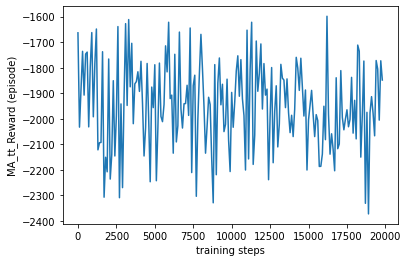

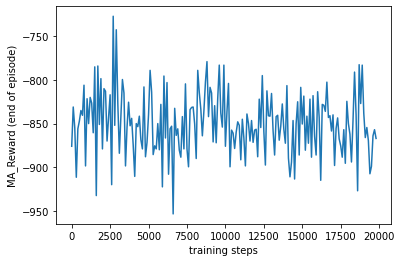

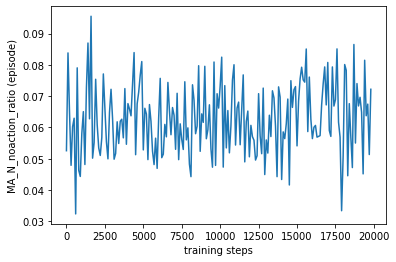

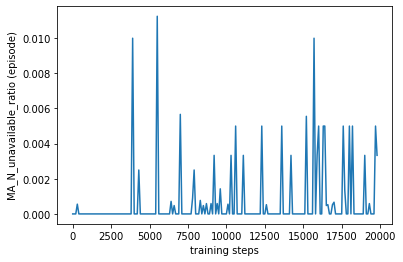

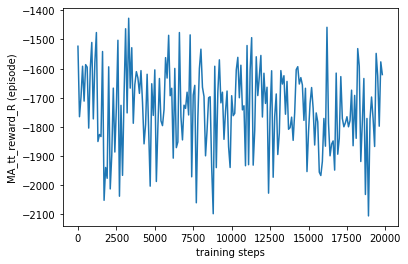

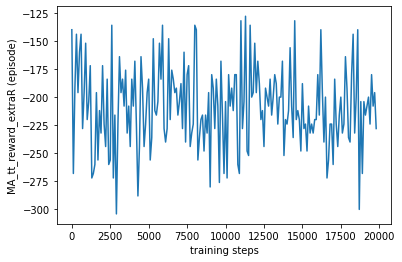

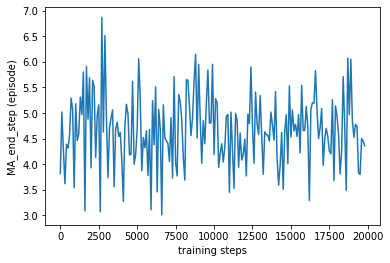

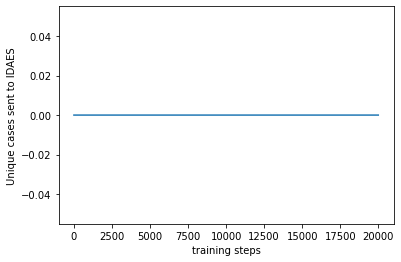

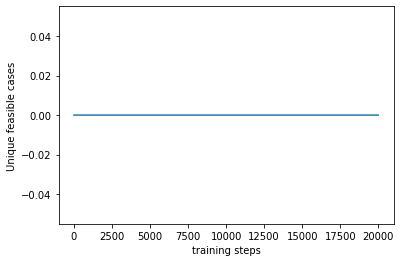

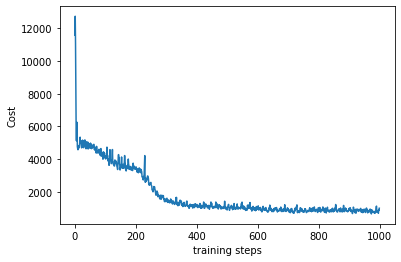

In [15]:
RL_call(user_inputs(),all_available(),P)